# Lecture 09 – Fall 2024

---



Data Science, Fall 2024

Import the libraries



In [ ]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In this lecture, we will demonstrate visualization techniques on the World Bank dataset. This dataset includes information about countries and development statistics from around the world.

Load DataFrame and visualize

In [ ]:
# load csv
wb_data = pd.read_csv('/content/drive/My Drive/world_bank.csv')
wb_data

,Unnamed: 0,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
4,5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,188,S. America,Guyana,87.0,81.0,NaN,NaN,92.0,94.0,82.0,...,76.0,84.0,99.0,95.0,84.0,29.0,7.4,7.4,69.0,80.0
162,189,S. America,Paraguay,89.0,90.0,71.0,77.0,99.0,98.0,96.0,...,52.0,89.0,83.0,93.0,NaN,NaN,NaN,NaN,71.0,87.0
163,190,S. America,Peru,99.0,100.0,84.0,87.0,99.0,99.0,97.0,...,53.0,76.0,92.0,90.0,60.0,57.0,NaN,NaN,87.0,80.0
164,191,S. America,Suriname,90.0,99.0,36.0,65.0,98.0,99.0,95.0,...,NaN,79.0,94.0,89.0,76.0,61.0,43.4,0.0,77.0,80.0


In [ ]:
wb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 48 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                           --------------  -----  
 0   Unnamed: 0                                                                                                                       166 non-null    int64  
 1   Continent                                                                                                                        166 non-null    object 
 2   Country                                                                                                                          166 non-null    object 
 3   Primary completion rate: Male: % of relevant age group: 2015                                        

In [ ]:
# shape of datagrame
wb_data.shape

(166, 48)

## Bar Plots

We often use bar plots to display **distributions** of a **categorical variable**.

In the examples below, we plot the distribution of the `"Continent"` column. The cell below uses `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [ ]:
# Code Here
continent_count = wb_data['Continent'].value_counts()
continent_count

,count
Continent,
Africa,47
Europe,43
Asia,34
N. America,18
Oceania,13
S. America,11


Now we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. First, let's generate a bar plot using the Matplotlib function `plt.bar`.

<BarContainer object of 6 artists>

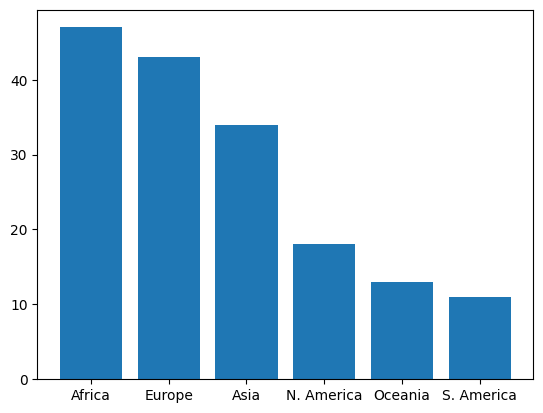

In [ ]:
# Code Here
import matplotlib.pyplot as plt
plt.bar(continent_count.index, continent_count.values )

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate, however, we will see extraneous text as well:

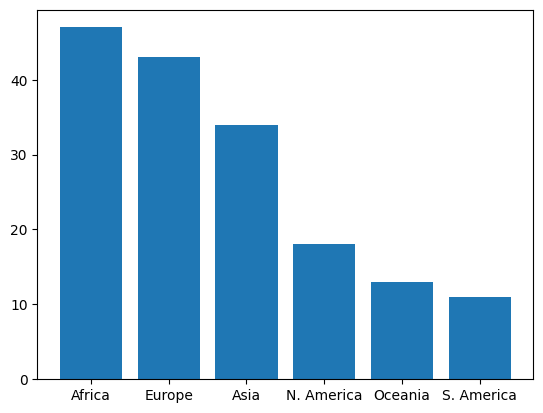

In [ ]:
# Code Here
plt.bar(continent_count.index, continent_count.values);


We also remember to set the axis labels and the title for the plot.

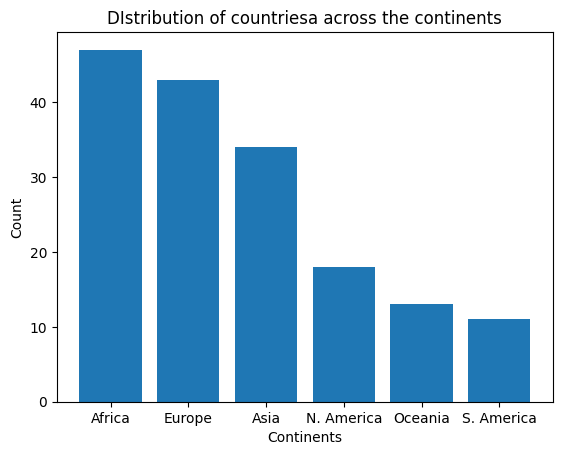

In [ ]:
# Code Here
plt.xlabel("Continents")
plt.ylabel("Count")
plt.title("DIstribution of countriesa across the continents")
plt.bar(continent_count.index, continent_count.values);

`pandas` native plotting:

<Axes: xlabel='Continent'>

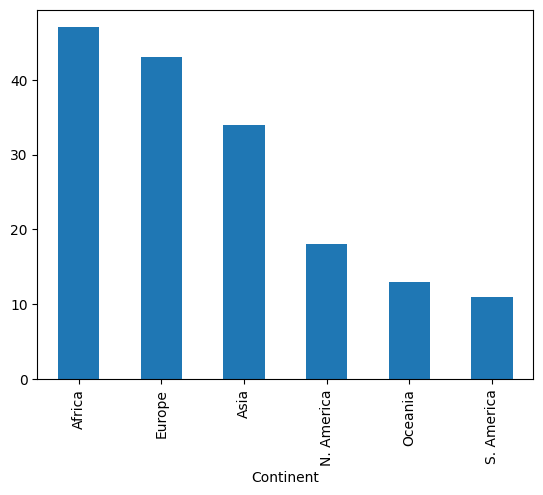

In [ ]:
# Code Here
wb_data['Continent'].value_counts().plot(kind='bar')

Equivalently, we could use the `countplot` method of the Seaborn library to create our bar plot.

<ipython-input-11-cf97dbb86ef4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wb_data, x='Continent', palette='Set2')


<Axes: xlabel='Continent', ylabel='count'>

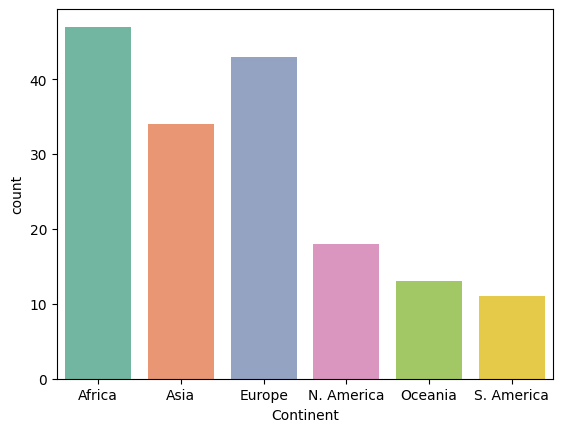

In [ ]:
# Code Here
import seaborn as sns
sns.countplot(data=wb_data, x='Continent', palette='Set2')

Above, we said that bar plots should only be used to visualize the distribution of a qualitative (categorical) variable. Why is that? Consider what happens when we try to use `sns.countplot` to visualize a quantitative variable, gross national income per capita.

<ipython-input-12-3ed879d67f34>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wb_data, x='Gross national income per capita, Atlas method: $: 2016', palette='Set2')


<Axes: xlabel='Gross national income per capita, Atlas method: $: 2016', ylabel='count'>

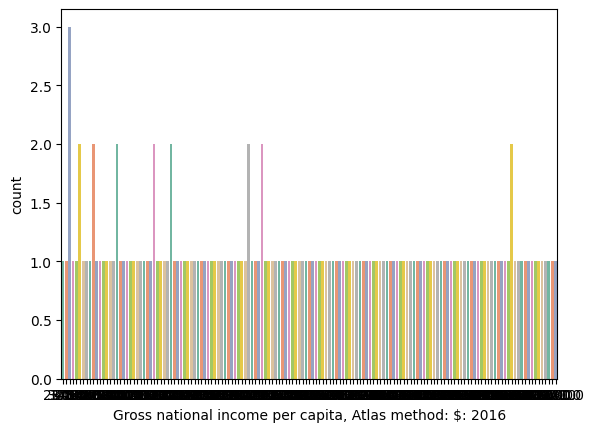

In [ ]:
# Code Here
sns.countplot(data=wb_data, x='Gross national income per capita, Atlas method: $: 2016', palette='Set2')

What happened? A bar plot (either `plt.bar` or `sns.countplot`) will create a separate bar for *each* unique value of a variable. With a continuous variable, we may not have a finite number of possible values, which can lead to situations where we would need many, many bars to display each unique value.

To visualize the distribution of a continuous variable, we use a different type of plot:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations. Both display the distribution of a variable using information about quartiles.

In a box plot, the width of the box at any point does not encode meaning. In a violin plot, the width of the plot indicates the *density* of the distribution at each possible value.

<Axes: ylabel='Gross national income per capita, Atlas method: $: 2016'>

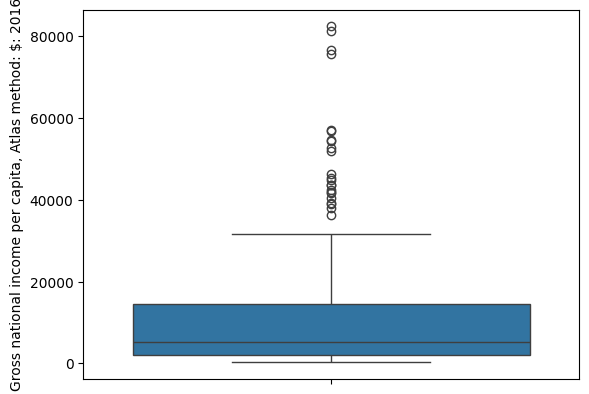

In [ ]:
# Code Here, use boxplot
sns.boxplot(data=wb_data, y="Gross national income per capita, Atlas method: $: 2016")

<Axes: ylabel='Gross national income per capita, Atlas method: $: 2016'>

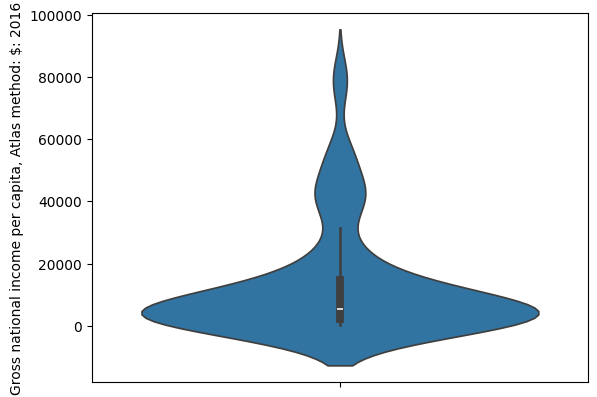

In [ ]:
# Code Here, Use voilinplot
sns.violinplot(data=wb_data, y="Gross national income per capita, Atlas method: $: 2016")

A quartile represents a 25% portion of the data. We say that:
* The first quartile (Q1) repesents the 25th percentile – 25% of the data lies below the first quartile
* The second quartile (Q2) represents the 50th percentile, also known as the median – 50% of the data lies below the second quartile
* The third quartile (Q3) represents the 75th percentile – 75% of the data lies below the third quartile.

This means that the middle 50% of the data lies *between* the first and third quartiles. This is demonstrated in the histogram below. The three quartiles are marked with red vertical bars.

Q1: 1.45, Q2: 2.9, Q3: 4.5


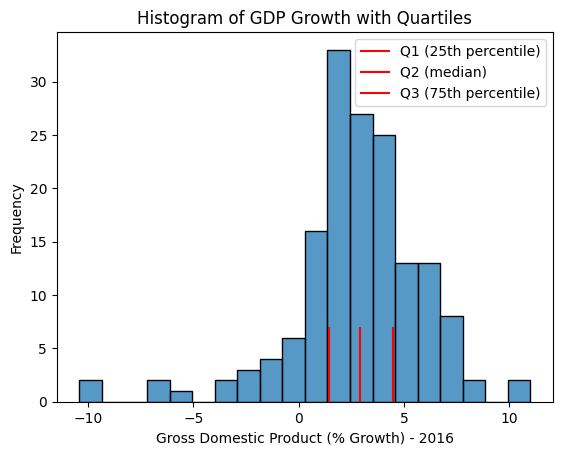

In [ ]:
# Code Here
column_data = wb_data['Gross domestic product: % growth : 2016'].dropna()
q1 = np.percentile(column_data, 25)
q2 = np.percentile(column_data, 50)
q3 = np.percentile(column_data, 75)
print(f"Q1: {q1}, Q2: {q2}, Q3: {q3}")
sns.histplot(data=wb_data, x='Gross domestic product: % growth : 2016')

plt.axvline(q1, color='red', linestyle='-', label='Q1 (25th percentile)', ymax= 0.2)
plt.axvline(q2, color='red', linestyle='-', label='Q2 (median)', ymax= 0.2)
plt.axvline(q3, color='red', linestyle='-', label='Q3 (75th percentile)', ymax= 0.2)

plt.legend()
plt.xlabel('Gross Domestic Product (% Growth) - 2016')
plt.ylabel('Frequency')
plt.title('Histogram of GDP Growth with Quartiles')
plt.show()

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

<ipython-input-29-b30baae1a360>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wb_data, x="Continent", y="Gross domestic product: % growth : 2016", palette="Set1");


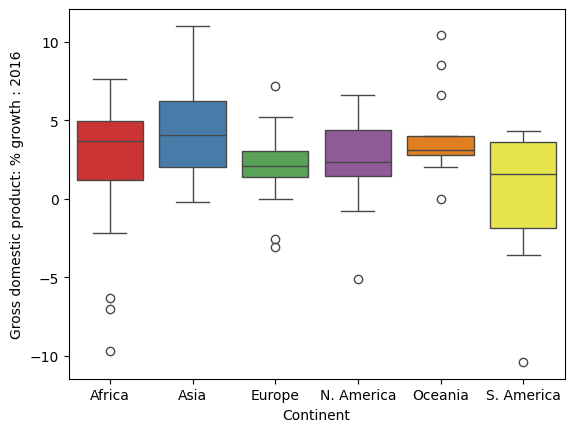

In [ ]:
# Code Here
sns.boxplot(data=wb_data, x="Continent", y="Gross domestic product: % growth : 2016", palette="Set1");

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

<Axes: ylabel='Gross domestic product: % growth : 2016'>

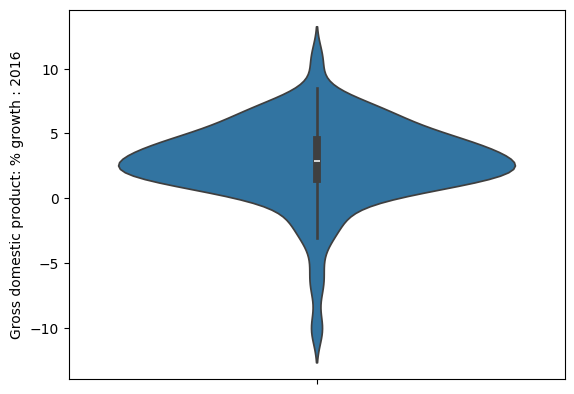

In [ ]:
# Code Here
sns.violinplot(data=wb_data, y="Gross domestic product: % growth : 2016")

Plotting side-by-side box or violin plots allow us to compare distributions across different categories. In other words, they enable us to plot *both* a qualitative variable and a quantitative continuous variable in one visualization.

Seaborn allows us to easily create side-by-side plots by specify both an `x` and `y` column.

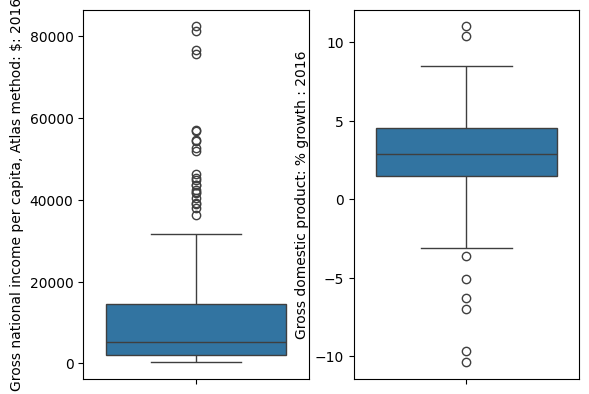

In [ ]:
# Code Here
fig, ax =plt.subplots(1,2)
sns.boxplot(wb_data['Gross national income per capita, Atlas method: $: 2016'], ax=ax[0])
sns.boxplot(wb_data['Gross domestic product: % growth : 2016'], ax=ax[1])
fig.show()